# Python-Powered SQLite Database for AntArchitecture Community Data

This Python module provides an efficient SQLite database for browsing, visualizing and processing Internal Reflecting Horizons (isochrones) across Antarctica, curated by the AntArchitecture action group. It is specifically designed for ice dynamic modelers who need a fast, memory-efficient data structure to constrain their models

## Datasets currently included in the database:

- Winter et al. 2018, (https://doi.org/10.1594/PANGAEA.895528)
- Cavitte et al. 2020, (https://doi.org/10.15784/601411)
- Beem et al. 2021, (https://doi.org/10.15784/601437)
- Wang et al. 2023, (https://doi.org/10.1594/PANGAEA.958462)
- Sanderson et al. 2024, (https://doi.org/10.5285/cfafb639-991a-422f-9caa-7793c195d316)
- Franke et al. 2025, (https://doi.org/10.1594/PANGAEA.973266)

## Jupyter Notebook 
This Jupyter Notebook gives you an overview of the current functionalities of this module. This includes:
- Browsing the database
- Quick visualization of the data of interest on Antarctic map
- Generating data for e.g. model-data comparison
- Reindexing and recompiling the database

## Browsing the database

First, initialize the Database class by providing the full path to the AntADatabase:

In [2]:
from anta_database import Database
database = Database('/home/anthe/documents/data/isochrones/AntADatabase/')

Use the query() function to browse the database. 'query()' without argument will return all metadata contained in the database:

In [6]:
database.query()

{'author': {'Beem_2021',
  'Cavitte_2020',
  'Franke_2025',
  'Sanderson_2024',
  'Wang_2023',
  'Winter_2018'},
 'age': {'10000',
  '10700',
  '108600',
  '11100',
  '122800',
  '128800',
  '135600',
  '15400',
  '159600',
  '161000',
  '162000',
  '165200',
  '16800',
  '169100',
  '199700',
  '219500',
  '253400',
  '25600',
  '278000',
  '29100',
  '29300',
  '31400',
  '326800',
  '340400',
  '36300',
  '367800',
  '37600',
  '38000',
  '38100',
  '400000',
  '420000',
  '46600',
  '4700',
  '4800',
  '48000',
  '483000',
  '51400',
  '516000',
  '52200',
  '559000',
  '610000',
  '705000',
  '7200',
  '72500',
  '73100',
  '73400',
  '74000',
  '75300',
  '81900',
  '90000',
  '91000',
  '93900',
  '95500',
  '97400',
  'BedElev',
  'IceThk',
  'SurfElev'},
 'reference': {'Beem et al. (2021)',
  'Cavitte et al. (2020)',
  'Franke et al. (2025)',
  'Sanderson et al. (2024)',
  'Wang et al. (2023)',
  'Winter et al. (2018)'},
 'doi': {'doi.org/10.15784/601411',
  'doi.org/10.15784/

Refine your search either by author, age, or trace_id, or by combining arguments. Lists are also allowed:

In [ ]:
#Examples of queries:
database.query(author='Cavitte_2020') # all data from Cavitte et al. 2020
database.query(age='38100') # all datasets with the 38.1ka isochrone
database.query(var='IceThk') # all datasets with IceThk variable
database.query(trace_id='DC_LDC_DIVIDE') # all layers with the trace ID DC_LDC_DIVIDE
database.query(author=['Franke_2025', 'Winter_2018'], age='38100') # example of multiple criteria

{'author': {'Franke_2025', 'Winter_2018'},
 'age': {'38100'},
 'reference': {'Franke et al. (2025)', 'Winter et al. (2018)'},
 'doi': {'doi.org/10.1594/PANGAEA.895528', 'doi.org/10.1594/PANGAEA.973266'},
 'trace_id': {'19972206',
  '19972303',
  '19972304',
  '19972307',
  '19972308',
  '19972309',
  '19972313',
  '19972402',
  '19972404',
  '19972405',
  '19972406',
  '19972408',
  '19972409',
  '19972415',
  '19973310',
  '19983101',
  '19983102',
  '19983201',
  '19983202',
  '19983204',
  '19983205',
  '19983206',
  '19983207',
  '19983401',
  '19983402',
  '19983403',
  '19983404',
  '19983406',
  '19983407',
  '19983408',
  '19983416',
  '19993026',
  '19993033',
  '19993104',
  '19993105',
  '19993106',
  '19993107',
  '19993109',
  '19993110',
  '19993112',
  '19993113',
  '19993115',
  '19993116',
  '19993118',
  '19993120',
  '19993122',
  '19993127',
  '19993131',
  '19993132',
  '19993134',
  '19993135',
  '19993136',
  '19993137',
  '20013010',
  '20013011',
  '20013012',


Note: ‘IceThk’, ‘SurfElev’ and ‘BedElev’ are also valid age values. This is convenient when one wants to process the surface elevation as a layer for example. However, I will probably move it to another query argument to avoid confusion.

## Visualization

Use the results of the query in the plotting functions:

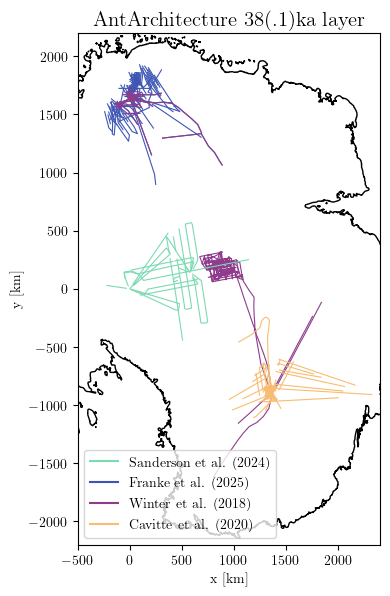

In [14]:
results = database.query(age=['38100','38000'])
database.plotXY(results,
                downscale_factor=1000, # downscale the datasets n times, which makes no visual difference but it is much lighter
                title='AntArchitecture 38(.1)ka layer',
                xlim=(-500, 2400), ylim=(-2200, 2200), # set the plot extent in km
                scale_factor=0.5, # adjust the size of the plot
                latex=True, # use latex compilers for plotting if you have them installed on your system
                # save='AntA_38ka.pdf', # Uncomment to save the figure, otherwise it we visualize with pyplot
                )

## Generate data from the database

Note: This part could be developed further in the future if there is the need. But for now, I am designing a separate Python module for constraining my ice sheet model of use, which is tailored to this database and other parallel processing libraries.

The data_generator() function reads the query and 'yield' the dataframes for later use.
Here is a quick example of how this can be used for computing the mean layer depth:

In [ ]:
results = database.query(age=['38100'])
lazy_dfs = database.data_generator(results)

import numpy as np
mean_depth_trs = []
for df, md in lazy_dfs:
    mean_depth_trs.append(np.mean(df['38100']))

mean_depth = np.mean(mean_depth_trs)
print('The mean depth of the 38.1ka isochrone across East Antarctica is', mean_depth, 'm')

The mean depth of the 38ka isochrone across East Antarctica is 1127.8887185238113 m


In the for loop, 'df' is an individual dataframe from the database, corresponding to a single layer of a single trace from a single dataset. The 'md' stores the unique metadata from the current 'df'. One can then associate the metadata with the current df, for example:

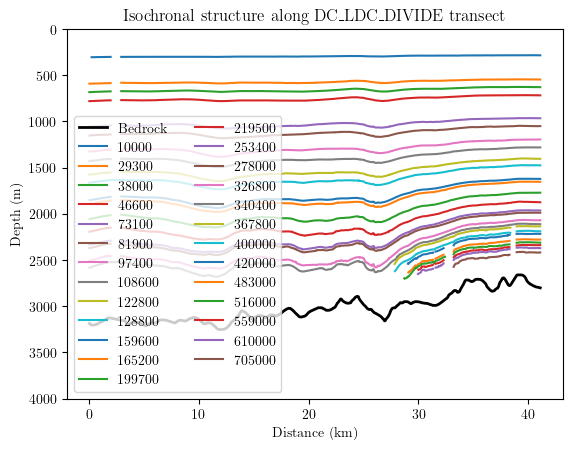

In [ ]:
results = database.query(author='Cavitte_2020', trace_id='DC_LDC_DIVIDE')
lazy_dfs = database.data_generator(results)

import matplotlib.pyplot as plt
# from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True) # Do you use latex?

for df, md in lazy_dfs:
    if md['age'] is not None:
        plt.plot(df.distance/1000, df[md['age']], label=md['age'])
    if md['var'] == 'IceThk':
        plt.plot(df.distance/1000, df['IceThk'], linewidth=2, color='k', label='Bedrock')

plt.legend(ncol=2)
plt.xlabel('Distance (km)')
plt.ylabel('Depth (m)')
plt.ylim(4000, 0)
plt.title('Isochronal structure along DC_LDC_DIVIDE transect')
plt.show()

### Downscale the data

The downscale_factor argument in the data_generator reduces the size of the generated data by n times. This is useful when dealing with large data where the downscaling has a neglectable influence on the results. 
Another solution, probably more straightforward, is the downsample_distance option, which allows to provide a distance in meters by which the data should be average along the transects:

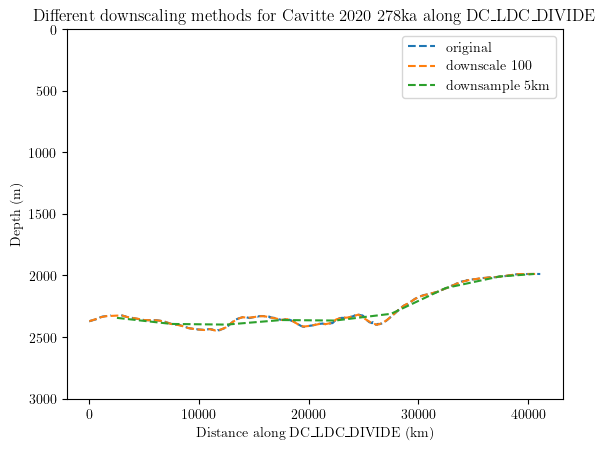

In [ ]:
import matplotlib.pyplot as plt

results = database.query(author='Cavitte_2020', age='278000', trace_id='DC_LDC_DIVIDE')
original = database.data_generator(results)
downscale_10 = database.data_generator(results, downscale_factor=100)
downsampled_by_distance = database.data_generator(results, downsample_distance=5000)

list = [original, downscale_10, downsampled_by_distance]
labels = ['original', 'downscale 100', 'downsample 5km']

for i, lazy_dfs in enumerate(list):
    for df, md in lazy_dfs:
        plt.plot(df.distance, df['278000'],label=labels[i], linestyle='--')

plt.ylim(3000, 0)
plt.xlabel('Distance along DC_LDC_DIVIDE (km)')
plt.ylabel('Depth (m)')
plt.legend()
plt.title('Different downscaling methods for Cavitte 2020 278ka along DC_LDC_DIVIDE')
plt.show()


## Advanced: Managing the database

### Reindexing

You may want for example to update the age of the layers in a particular dataset. For this, you just need to modify the ages in the file called ‘IRH_ages.tab’ located under a dataset directory. Then, reindex with the IndexDatabase class:

In [ ]:
from anta_database import IndexDatabase

db_path = '/home/anthe/documents/data/isochrones/AntADatabase/' 
indexing = IndexDatabase(db_path)
indexing.index_database() 

### (Re)compile the database

You can (re)compile the database, if for example you modify some data in the raw directories or if you add a dataset. For this, make sure to follow the structure: 

In [ ]:
AntADatabase/
├── AntADatabase.db
├── database_index.csv #List of directories to index: Author_YYYY,Author et al. YYYY,doi
├── Author_YYYY
    ├── IRH_ages.tab #IRH file names without .ext followed by there respective age in years
    ├── original_new_column_names.csv #first row: names of columns to keep from raw files, second row: how the columns should be renamed
    ├── raw/
    └── pkl/

Then use the CompileDatabase class to compile the database:

In [ ]:
from anta_database import CompileDatabase

dir_path_list = [ # list of the dataset subdirectories to compile
    './Winter_2018',
    './Sanderson_2024',
    './Franke_2025',
    './Cavitte_2020',
    './Beem_2021',
]

compiler = CompileDatabase(dir_path_list)
compiler.compile()

Then reindex (see above). By default, it assumes that the files in raw/ are sorted by IRH (one file = one layer and multiple traces). If the files are sorted the other way around (one file = one trace and multiple layers), you can set file_type=’trace’ in CompileDatabase(). Furthermore, if the depth is not given in meters but TWT, you should set the wave_speed (units should match values in the file) for conversion and firn_correction (meters):

In [ ]:
dir_path = './Wang_2023'
compiler = CompileDatabase(dir_path, file_type='trace', wave_speed=0.1685, firn_correction=15.5)
compiler.compile()